# K-Means Clustering
k-means is one of the most widely used clustering algorithms. It works by partitioning data into a predefined number of clusters (denoted by k). Each data point is assigned to the nearest cluster based on the distance from the cluster's centroid (the center of the cluster).
## Use cases
- Customer segmentation: grouping customers based on purchasing behavior
- Image compression: reducing the number of colors in an image by clustering similar colors together
## Importing the libraries needed for data handling, clustering, and visualization.
- pandas for data manipulation
- Matplotlib for plotting and visualization
- k-means from Scikit-Learn to apply the k-means clustering algorithm
- StandardScaler for normalizing the dataset before clustering
## How it works
- Choose the number of clusters (k).
- Initialize centroids randomly.
- Assign each data point to the nearest centroid based on distance (usually Euclidean distance).
- Update the centroids by calculating the mean of the points in each cluster.
- Repeat the assignment, and update the steps until the centroids no longer move or the assignments do not change.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Loading the dataset
For this example, we will use a fictional customer dataset where each row represents a customer, and the features are AnnualIncome and SpendingScore.

In [26]:
# Creating a sample dataset with customer annual income and spending score
data = {'AnnualIncome': [
        15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 
        20, 20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 
        25, 25.5, 26, 26.5, 27, 27.5, 28, 28.5, 29, 29.5, 
        30, 30.5, 31, 31.5, 32, 32.5, 33, 33.5, 34, 34.5, 
        35,   # Normal points
        80, 85, 90  # Outliers
    ],
    'SpendingScore': [
        39, 42, 45, 48, 51, 54, 57, 60, 63, 66,
        69, 72, 75, 78, 81, 84, 87, 90, 93, 96,
        6, 9, 12, 15, 18, 21, 24, 27, 30, 33,
        5, 8, 11, 14, 17, 20, 23, 26, 29, 32,
        56,   # Normal points
        2, 3, 100  # Outliers
    ]}

df = pd.DataFrame(data)

# Displaying the first few rows of the dataset
print(df.head())

   AnnualIncome  SpendingScore
0          15.0             39
1          15.5             42
2          16.0             45
3          16.5             48
4          17.0             51


## Preprocessing the data
Clustering algorithms are sensitive to the scale of the features, so it’s essential to normalize the data. I’ll use StandardScaler to scale the features.

In [27]:
# Normalizing the dataset using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Converting the scaled data back into a DataFrame for easier handling
df_scaled = pd.DataFrame(df_scaled, columns=['AnnualIncome', 'SpendingScore'])
print(df_scaled.head())

   AnnualIncome  SpendingScore
0     -0.869761      -0.135877
1     -0.838899      -0.033387
2     -0.808036       0.069103
3     -0.777174       0.171594
4     -0.746311       0.274084


## Implementing k-means clustering
Now it’s time to implement the k-means clustering algorithm. First, I’ll initialize the algorithm with a predefined number of clusters (k), fit it to the data, and then assign each data point to a cluster.

In [28]:
# Initializing the KMeans algorithm with k clusters
k = 3  # Starting with 3 clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fitting the model and assigning cluster labels
kmeans.fit(df_scaled)
df['Cluster'] = kmeans.labels_

# Displaying the first few rows with cluster assignments
print(df.head())

   AnnualIncome  SpendingScore  Cluster
0          15.0             39        2
1          15.5             42        2
2          16.0             45        2
3          16.5             48        2
4          17.0             51        2


## Visualizing the clusters
Now that I’ve clustered the data, let’s visualize the clusters using a scatterplot. I’ll color the data points based on their assigned cluster.

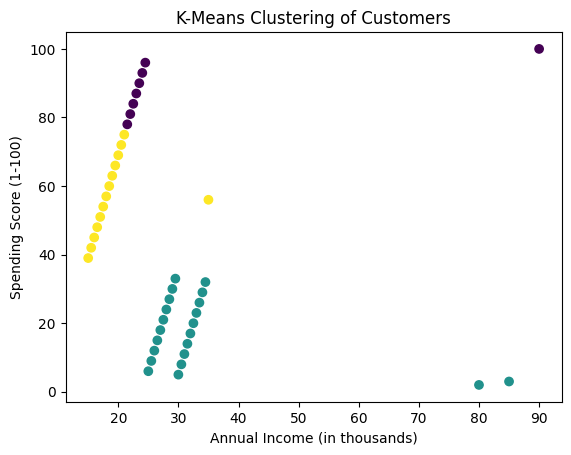

In [29]:
# Ploting the clusters
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()

This scatterplot shows how the data points are grouped into clusters based on their annual income and spending score.

## Finding the optimal number of clusters (optional)
One way to determine the optimal number of clusters (k) is by using the elbow method, which involves plotting the within-cluster sum of squares (WCSS) against the number of clusters.

Here’s how to apply the elbow method:

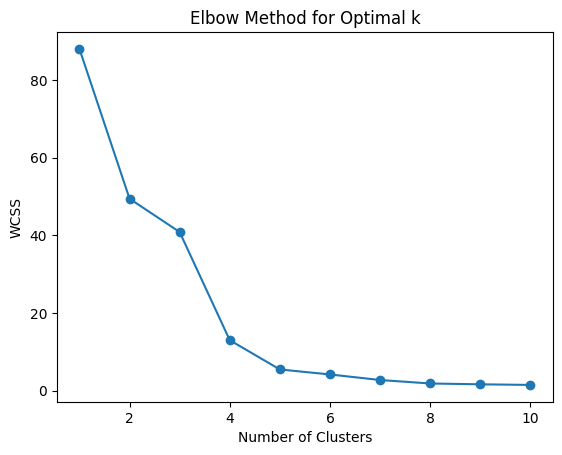

In [30]:
# Calculating the WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to visualize the Elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Result Intrepretation
The elbow plot, the x-axis represents the number of clusters (k), and the y-axis represents the WCSS. The "elbow" point is the value of k where the reduction in WCSS starts to slow down. In this case,  an elbow around k = 3 or k = 4, indicating that these values are optimal for this dataset.